given points:  [(7, 3), (5, 6), (5, 9), (2, 3), (3, 9), (2, 9), (0, 2), (1, 0)]


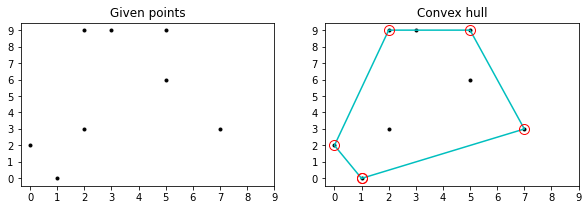

vertices of convex hull: [(1, 0), (7, 3), (5, 9), (2, 9), (0, 2)]


In [1]:
from functools import cmp_to_key
import matplotlib.pyplot as plt
from random import *

def orientation(p, q, r):
    '''Returns the orientation of the triplet (p, q, r).
    Returns 0 if they are collinear, 1 if clockwise, and 2 if counter-clockwise.'''
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else 2

def compare(p1, p2, anchor):
    '''Compares two points based on their polar angle with respect to the anchor point.'''
    o = orientation(anchor, p1, p2)
    if o == 0:
        return -1 if (p1[0] + p1[1]) < (p2[0] + p2[1]) else 1
    return -1 if o == 2 else 1

def graham_scan(points):
    '''Returns the convex hull of a set of points using the Graham scan algorithm.'''
    n = len(points)
    if n < 3:
        return []
    hull = []
    ymin = points[0][1]
    min_idx = 0
    for i in range(1, n):
        if points[i][1] < ymin or (points[i][1] == ymin and points[i][0] < points[min_idx][0]):
            ymin = points[i][1]
            min_idx = i
    anchor = points[min_idx]
    points.pop(min_idx)
    points.sort(key=cmp_to_key(lambda p1, p2: compare(p1, p2, anchor)))
    hull.append(anchor)
    hull.append(points[0])
    for i in range(1, n-1):
        while len(hull) > 1 and orientation(hull[-2], hull[-1], points[i]) != 2:
            hull.pop()
        hull.append(points[i])
    if orientation(hull[-2], hull[-1], anchor) != 2:
        hull.pop()
    points.append(anchor)
    return hull


points = []
while len(points) < 8:
    rand = (randint(0, 10), randint(0,9))
    if rand not in points:
        points.append(rand)

convex_hull = graham_scan(points)
print("given points: ", points)

x = []
y = []
for point in points:
    x.append(point[0])
    y.append(point[1])

x1 = []
y1 = []
for point in convex_hull:
    x1.append(point[0])
    y1.append(point[1])
x1.append(convex_hull[0][0])
y1.append(convex_hull[0][1])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
for ax in (ax1, ax2):
    ax.plot(x, y, '.', color='k')
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        
        ax.plot(x1, y1 , 'c')
        ax.plot(x1, y1, 'o', mec='r', color='none', lw=1, markersize=10)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
plt.show()


print("vertices of convex hull:", convex_hull)